In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


In [2]:
def load_mat_file(filepath):
    mat = scipy.io.loadmat(filepath)
    print(f"Loaded {filepath} using scipy.io.loadmat")
    return mat

In [3]:
eeg_file_path = '/Users/rahul/PycharmProjects/Thesis-EEG/osfstorage-archive/task1 - NR/Raw data/YAC/YAC_NR1_EEG.mat'

eeg_data = load_mat_file(eeg_file_path)

Loaded /Users/rahul/PycharmProjects/Thesis-EEG/osfstorage-archive/task1 - NR/Raw data/YAC/YAC_NR1_EEG.mat using scipy.io.loadmat


### EEG Analysis

In [4]:
print(eeg_data['EEG'][0, 0]) # EEG Data structure

(array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], shape=(0, 0), dtype=uint8), array(['Original file: V:\\Ce_ETH\\2019\\Sorted\\YAC\\YAC 20190429 1723001.RAW'],
      dtype='<U65'), array([[128]], dtype=uint8), array([[1]], dtype=uint8), array([[225411]], dtype=int32), array([[500]], dtype=uint16), array([[-0.]]), array([[450.82]]), array([[-0.00000e+00,  2.00000e+00,  4.00000e+00, ...,  4.50816e+05,
         4.50818e+05,  4.50820e+05]]), array([[ -8608.2265625 ,  -8590.71191406,  -8534.28125   , ...,
         -8706.42871094,  -8764.57617188,  -8797.41796875],
       [ -9405.4765625 ,  -9389.46679688,  -9337.8828125 , ...,
         -7675.56103516,  -7746.24121094,  -7788.71191406],
       [-14141.72363281, -14125.93066406, -14068.42089844, ...,
        -13245.39257812, -13301.41894531, -13331.96582031],
       ...,
       [  3616.75366211,   3633.81494141,   3692.7980957 , ...,
     

In [5]:
# Listing Field names

eeg_field_names = eeg_data['EEG'][0, 0].dtype.names
print(eeg_field_names)

('setname', 'filename', 'filepath', 'subject', 'group', 'condition', 'session', 'comments', 'nbchan', 'trials', 'pnts', 'srate', 'xmin', 'xmax', 'times', 'data', 'icaact', 'icawinv', 'icasphere', 'icaweights', 'icachansind', 'chanlocs', 'urchanlocs', 'chaninfo', 'ref', 'event', 'urevent', 'eventdescription', 'epoch', 'epochdescription', 'reject', 'stats', 'specdata', 'specicaact', 'splinefile', 'icasplinefile', 'dipfit', 'history', 'saved', 'etc')


In [8]:
# Accessing EEG Data
eeg_data_array = eeg_data['EEG'][0, 0]['data']

# shape of EEG data
print(eeg_data_array.shape)
print(eeg_data_array[0][:10])

# field names in eeg_data_array
print(type(eeg_data_array))

(128, 225411)
[-8608.2265625  -8590.71191406 -8534.28125    -8536.79492188
 -8594.17578125 -8614.078125   -8641.74902344 -8694.26367188
 -8695.81933594 -8646.59863281]
<class 'numpy.ndarray'>


In [7]:
import scipy.signal as signal

EEG Band Power:
          theta        alpha         beta        gamma
0  1098.674624   421.733269   387.784500  1140.397633
1  1300.691951   500.826592   457.496057  1148.593397
2  2909.075975  1117.453013  1017.056689  1307.177479
3   511.102131   195.337815   178.835735   955.819804
4   318.181372   122.282577   112.037900   654.510522


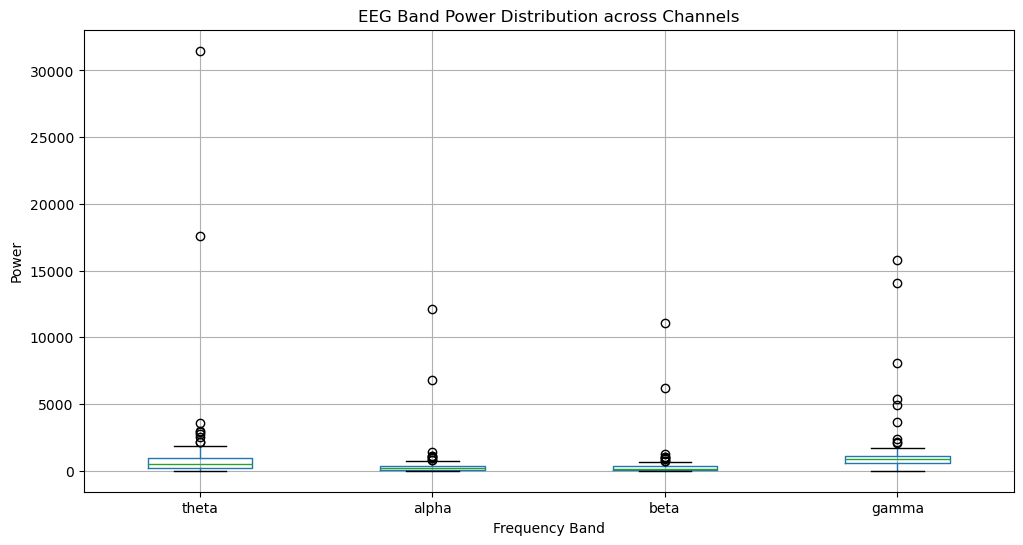

<Figure size 640x480 with 0 Axes>

In [8]:
# Define frequency bands for analysis
frequency_bands = {
    "theta": (4, 8),
    "alpha": (8, 13),
    "beta": (13, 30),
    "gamma": (30, 50)
}

# Filter and compute power for each frequency band
eeg_band_power = {}

for band, (low, high) in frequency_bands.items():
    # Bandpass filter for each band
    sos = signal.butter(4, [low, high], btype='band', fs=eeg_data['EEG'][0, 0]['srate'][0][0], output='sos')
    filtered_data = signal.sosfilt(sos, eeg_data_array, axis=1)  # Filtering each channel
    
    # Calculate power (mean squared amplitude)
    band_power = np.mean(filtered_data ** 2, axis=1)
    eeg_band_power[band] = band_power

# Convert to DataFrame for visualization
import pandas as pd
eeg_band_power_df = pd.DataFrame(eeg_band_power)

# Display power per band per channel
print("EEG Band Power:\n", eeg_band_power_df.head())

# Plotting power distributions for each band
plt.figure(figsize=(12, 6))
eeg_band_power_df.boxplot()
plt.title("EEG Band Power Distribution across Channels")
plt.ylabel("Power")
plt.xlabel("Frequency Band")
plt.show()
plt.savefig("EEG_band_power_distribution.png")